# Load Dataset

In [1]:
import pandas as pd
import os
import numpy as np
from pprint import pprint

In [2]:
from pathlib import Path

def load_data(directory, nrows=1000):
# Read each CSV file in dir "path/to/root_dir"
    dfs = []
    for file in Path(directory).glob('**/*.csv'):
        dfs.append(pd.read_csv(file, nrows=nrows))
    # Put the dataframes to a single dataframe
    df = pd.concat(dfs, ignore_index=True)
    return df

benign_dir = os.path.join(os.getcwd(), 'dataset', 'Benign')
malware_dir = os.path.join(os.getcwd(), 'dataset', 'Malware')

benign_df = load_data(benign_dir, nrows=100)
malware_df = load_data(malware_dir, nrows=400)

df = pd.concat([benign_df, malware_df], ignore_index=True)
# trim columns labels
df.columns = df.columns.str.strip()

In [3]:
df.shape

(298501, 85)

<Axes: xlabel='Label', ylabel='# occurrences'>

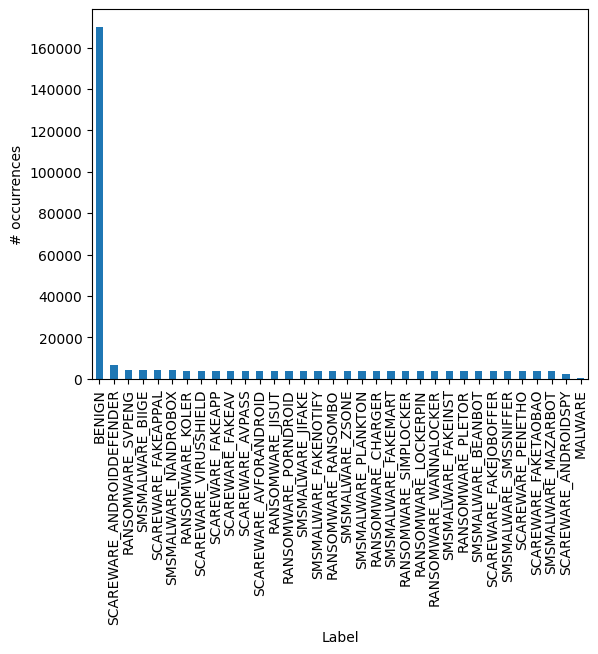

In [4]:
df["Label"].value_counts().plot(
    kind="bar",
    xlabel="Label",
    ylabel="# occurrences"
)

In [5]:
df["Label"] = df["Label"].apply(lambda x: 'MALWARE' if x != 'BENIGN' else x)

<Axes: xlabel='Label', ylabel='# occurrences'>

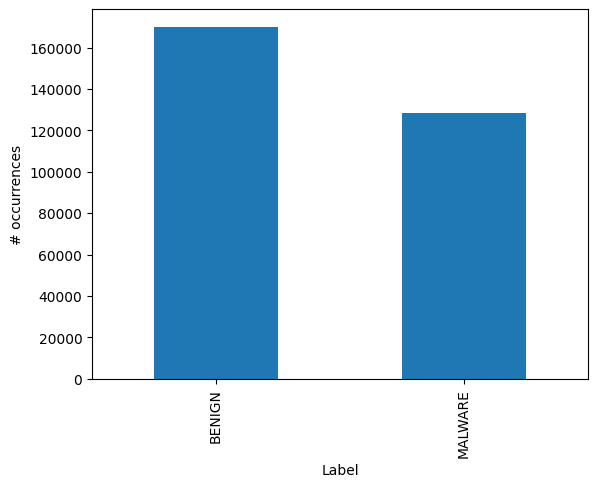

In [6]:
df["Label"].value_counts().plot(
    kind="bar",
    xlabel="Label",
    ylabel="# occurrences"
)

In [7]:
# shuffle dataset
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,10.42.0.211-31.13.71.7-46258-443-6,10.42.0.211,46258,31.13.71.7,443,6,07/07/2017 10:41:34,66994155,37,86,...,32,1994240.0,0.0,1994240.0,1994240.0,64999821.0,0.0,64999821.0,64999821.0,BENIGN
1,10.42.0.151-31.13.80.5-44777-443-6,10.42.0.151,44777,31.13.80.5,443,6,30/06/2017 09:49:33,16906,2,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MALWARE
2,172.217.11.4-10.42.0.42-443-47406-6,10.42.0.42,47406,172.217.11.4,443,6,23/06/2017 01:56:28,142202,5,5,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MALWARE
3,172.217.10.3-10.42.0.151-443-54987-6,10.42.0.151,54987,172.217.10.3,443,6,29/08/2017 03:35:25,1755726,15,26,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MALWARE
4,172.217.0.234-10.42.0.211-443-40791-6,172.217.0.234,443,10.42.0.211,40791,6,19/06/2017 10:04:40,196452,1,5,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


# Data Preprocessing

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Source IP'] = label_encoder.fit_transform(df['Source IP'])
df['Flow ID'] = label_encoder.fit_transform(df['Flow ID'])
df['Destination IP'] = label_encoder.fit_transform(df['Destination IP'])

# drop column Timestamp
df = df.drop(['Timestamp'], axis=1)
df = df.dropna()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Label'], axis=1),
    df['Label'],
    test_size=0.4,
    random_state=42
)

#p = 0.8
#train_df, test_df = df[:int(len(df)*p)], df[int(len(df)*p):]

X_train.shape, X_test.shape

((179100, 83), (119401, 83))

In [10]:
X_train.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
100292,80089,8,35397,1495,443,6,1730812,17,0,31.0,...,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
179055,92195,9,50678,1552,443,6,256,2,0,31.0,...,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
293578,135397,9,34185,2054,443,6,1975957,2,0,0.0,...,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
250734,1087,8,39538,39,80,6,53434619,2,0,0.0,...,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
273766,105710,8,33180,1612,443,6,2927589,41,37,9016.0,...,10,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Valutazione

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=classes,
        yticklabels=classes,
        title=title,
        ylabel='True label',
        xlabel='Predicted label'
    )
    plt.setp(
        ax.get_xticklabels(),
        rotation=45,
        ha='right',
        rotation_mode='anchor'
    )
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), ha='center', va='center', color='white' if cm[i, j] > thresh else 'black')
    fig.tight_layout()
    return ax

def valuate(clf, x_test, y_test):
    y_pred = clf.predict(x_test)
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, classes=clf.classes_, title='Confusion matrix')


# Decision Tree

In [11]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)

[Text(0.5, 0.875, 'Flow ID <= 15219.5\ngini = 0.49\nsamples = 179100\nvalue = [102025, 77075]\nclass = BENIGN'),
 Text(0.25, 0.625, 'Fwd Packet Length Std <= 15.405\ngini = 0.485\nsamples = 17747\nvalue = [7358, 10389]\nclass = MALWARE'),
 Text(0.125, 0.375, 'Fwd IAT Total <= 463633.0\ngini = 0.444\nsamples = 9682\nvalue = [3222, 6460]\nclass = MALWARE'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Bwd IAT Max <= 284583.5\ngini = 0.5\nsamples = 8065\nvalue = [4136, 3929]\nclass = BENIGN'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Fwd IAT Mean <= 7460.357\ngini = 0.485\nsamples = 161353\nvalue = [94667, 66686]\nclass = BENIGN'),
 Text(0.625, 0.375, 'Bwd Packets/s <= 3298.636\ngini = 0.446\nsamples = 47035\nvalue = [31225, 15810]\nclass = BENIGN'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Min Packet Length <= 2.0\ngini =

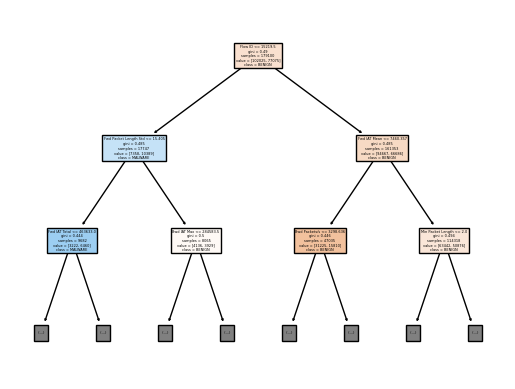

In [12]:
tree.plot_tree(decision_tree, filled=True, class_names=decision_tree.classes_, feature_names=X_train.columns, max_depth=2)

In [ ]:
valuate(decision_tree, X_test, y_test)

In [14]:
from sklearn.model_selection import cross_validate

scores = cross_validate(
    decision_tree,
    X_train,
    y_train,
    cv=10,
    scoring=['precision_macro', 'recall_macro']
)

In [15]:
print(f'{10}-fold cross validation:')
print('Precision: %0.2f (+/- %0.2f)' % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2))
print('Recall: %0.2f (+/- %0.2f)' % (scores['test_recall_macro'].mean(), scores['test_recall_macro'].std() * 2))

10-fold cross validation:
Precision: 0.75 (+/- 0.01)
Recall: 0.75 (+/- 0.00)


# Support Vector Machine

In [21]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

C=1.0
models = (
    # svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=1000, dual=True),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    #svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = [clf.fit(X_train[:10_000], y_train[:10_000]) for clf in models]

/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC:
              precision    recall  f1-score   support

      BENIGN       0.57      0.76      0.65      2235
     MALWARE       0.49      0.29      0.36      1765

    accuracy                           0.55      4000
   macro avg       0.53      0.52      0.51      4000
weighted avg       0.54      0.55      0.52      4000

SVC:
              precision    recall  f1-score   support

      BENIGN       0.56      1.00      0.72      2235
     MALWARE       1.00      0.01      0.02      1765

    accuracy                           0.56      4000
   macro avg       0.78      0.50      0.37      4000
weighted avg       0.75      0.56      0.41      4000



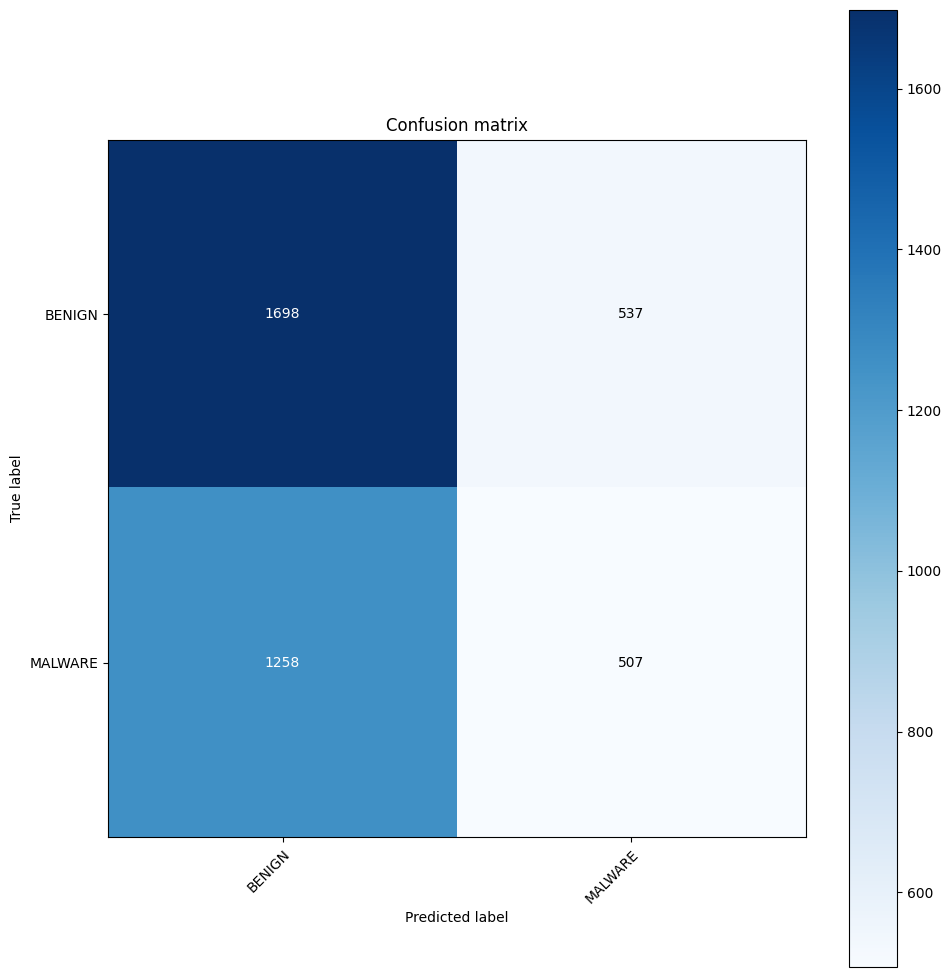

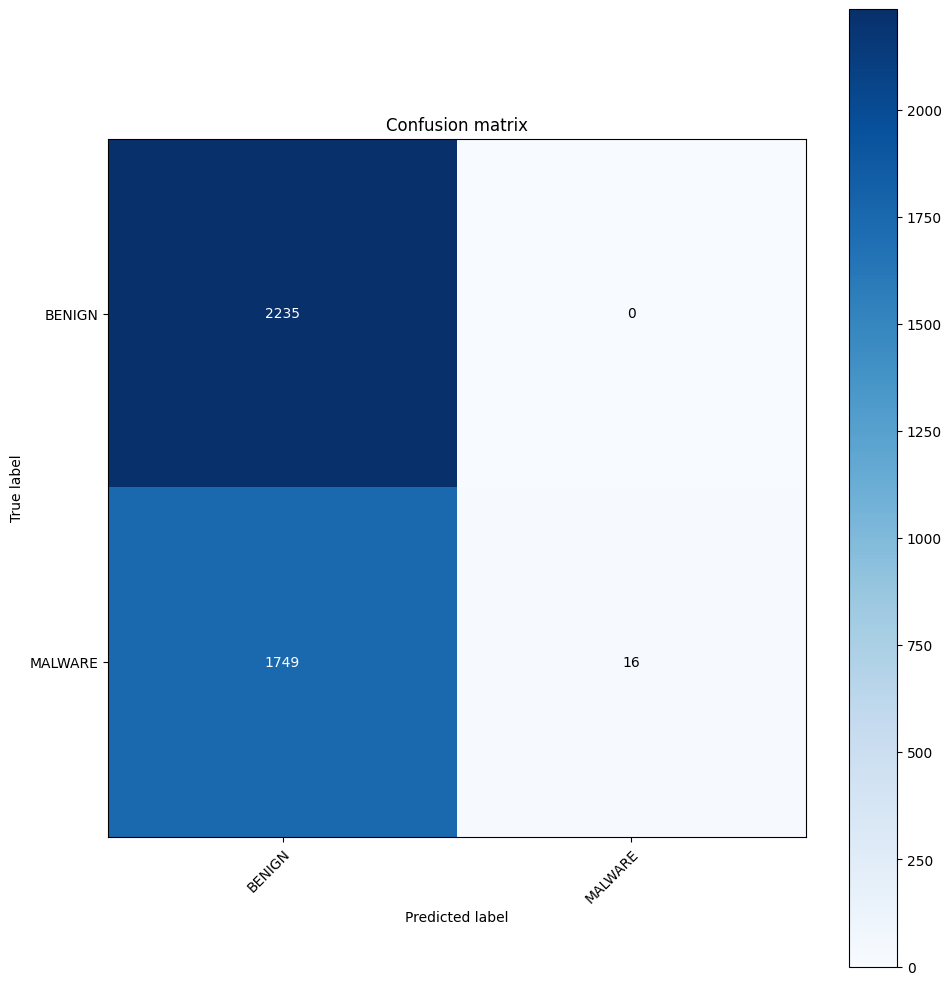

In [26]:
# valuate models

for clf in models:
    # print scores 
    print(f'{clf.__class__.__name__}:')
    valuate(clf, X_test[:4_000], y_test[:4_000])

### Plot uscito male

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

models2 = (
    # svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual=True),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    #svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)

models2 = (clf.fit(X_reduced[:5000], y_train[:5000]) for clf in models2)

/usr/local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


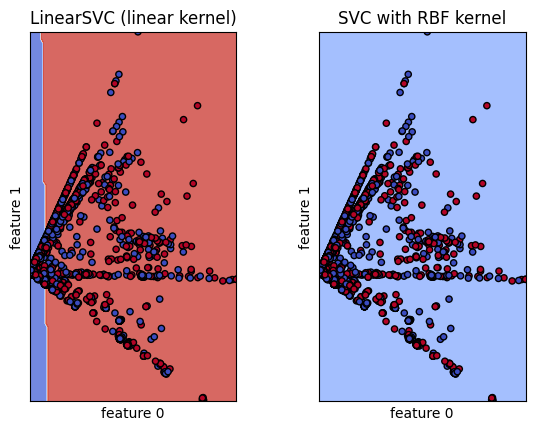

In [68]:
# title for the plots
titles = (
    #"SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    #"SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_reduced[:5000][:, 0] , X_reduced[:5000][:, 1]

for clf, title, ax in zip(models2, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_reduced[:5000],
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel="feature 0",
        ylabel="feature 1",
    )

    # encode labels to 0, 1 classes
    y_labels = label_encoder.fit_transform(y_train[:5000])

    ax.scatter(X0, X1, c=y_labels, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()